### Team Members:  
* Aaron Basch
* Vrushali Koli
* Bryan Patrick Cullano
* Nehali Parulekar

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.preprocessing import OneHotEncoder

In [80]:
train = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')

### First let's looks at the summary for numerical data to get a sense of the data:

In [81]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### We plot a heatmap to measure multicollinearity in our features

<AxesSubplot:>

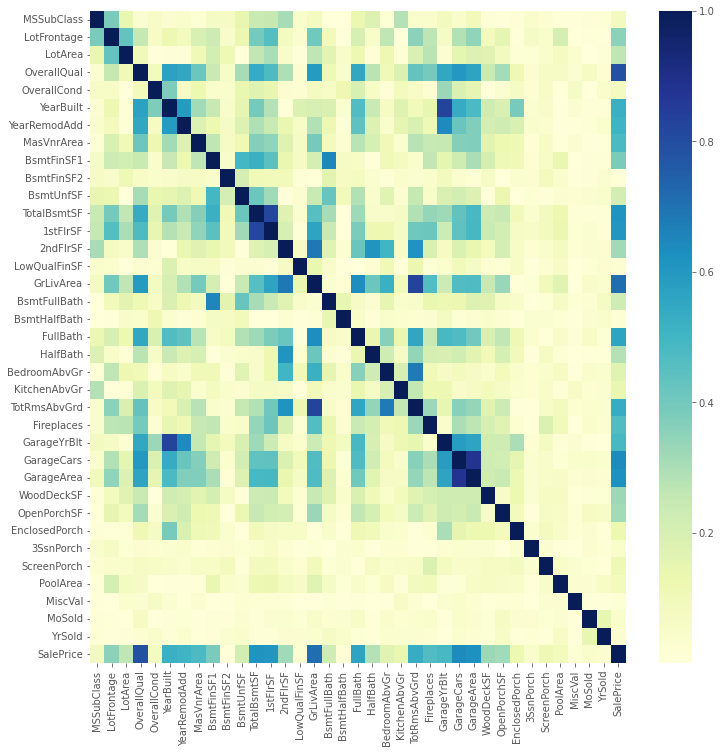

In [82]:
plt.figure(figsize=(12, 12))
sns.heatmap(abs(train.drop('Id', axis=1).corr()), cmap='YlGnBu')

### Some features pairs are so highly correlated, we can drop one from our data to improve our model:

In [83]:
remove_num = ['GarageArea', 'TotalBsmtSF', 'GarageYrBlt', 'TotRmsAbvGrd']
train = train.drop(remove_num,axis=1)

### Now, let's examine categorical features by plotting their distributions:

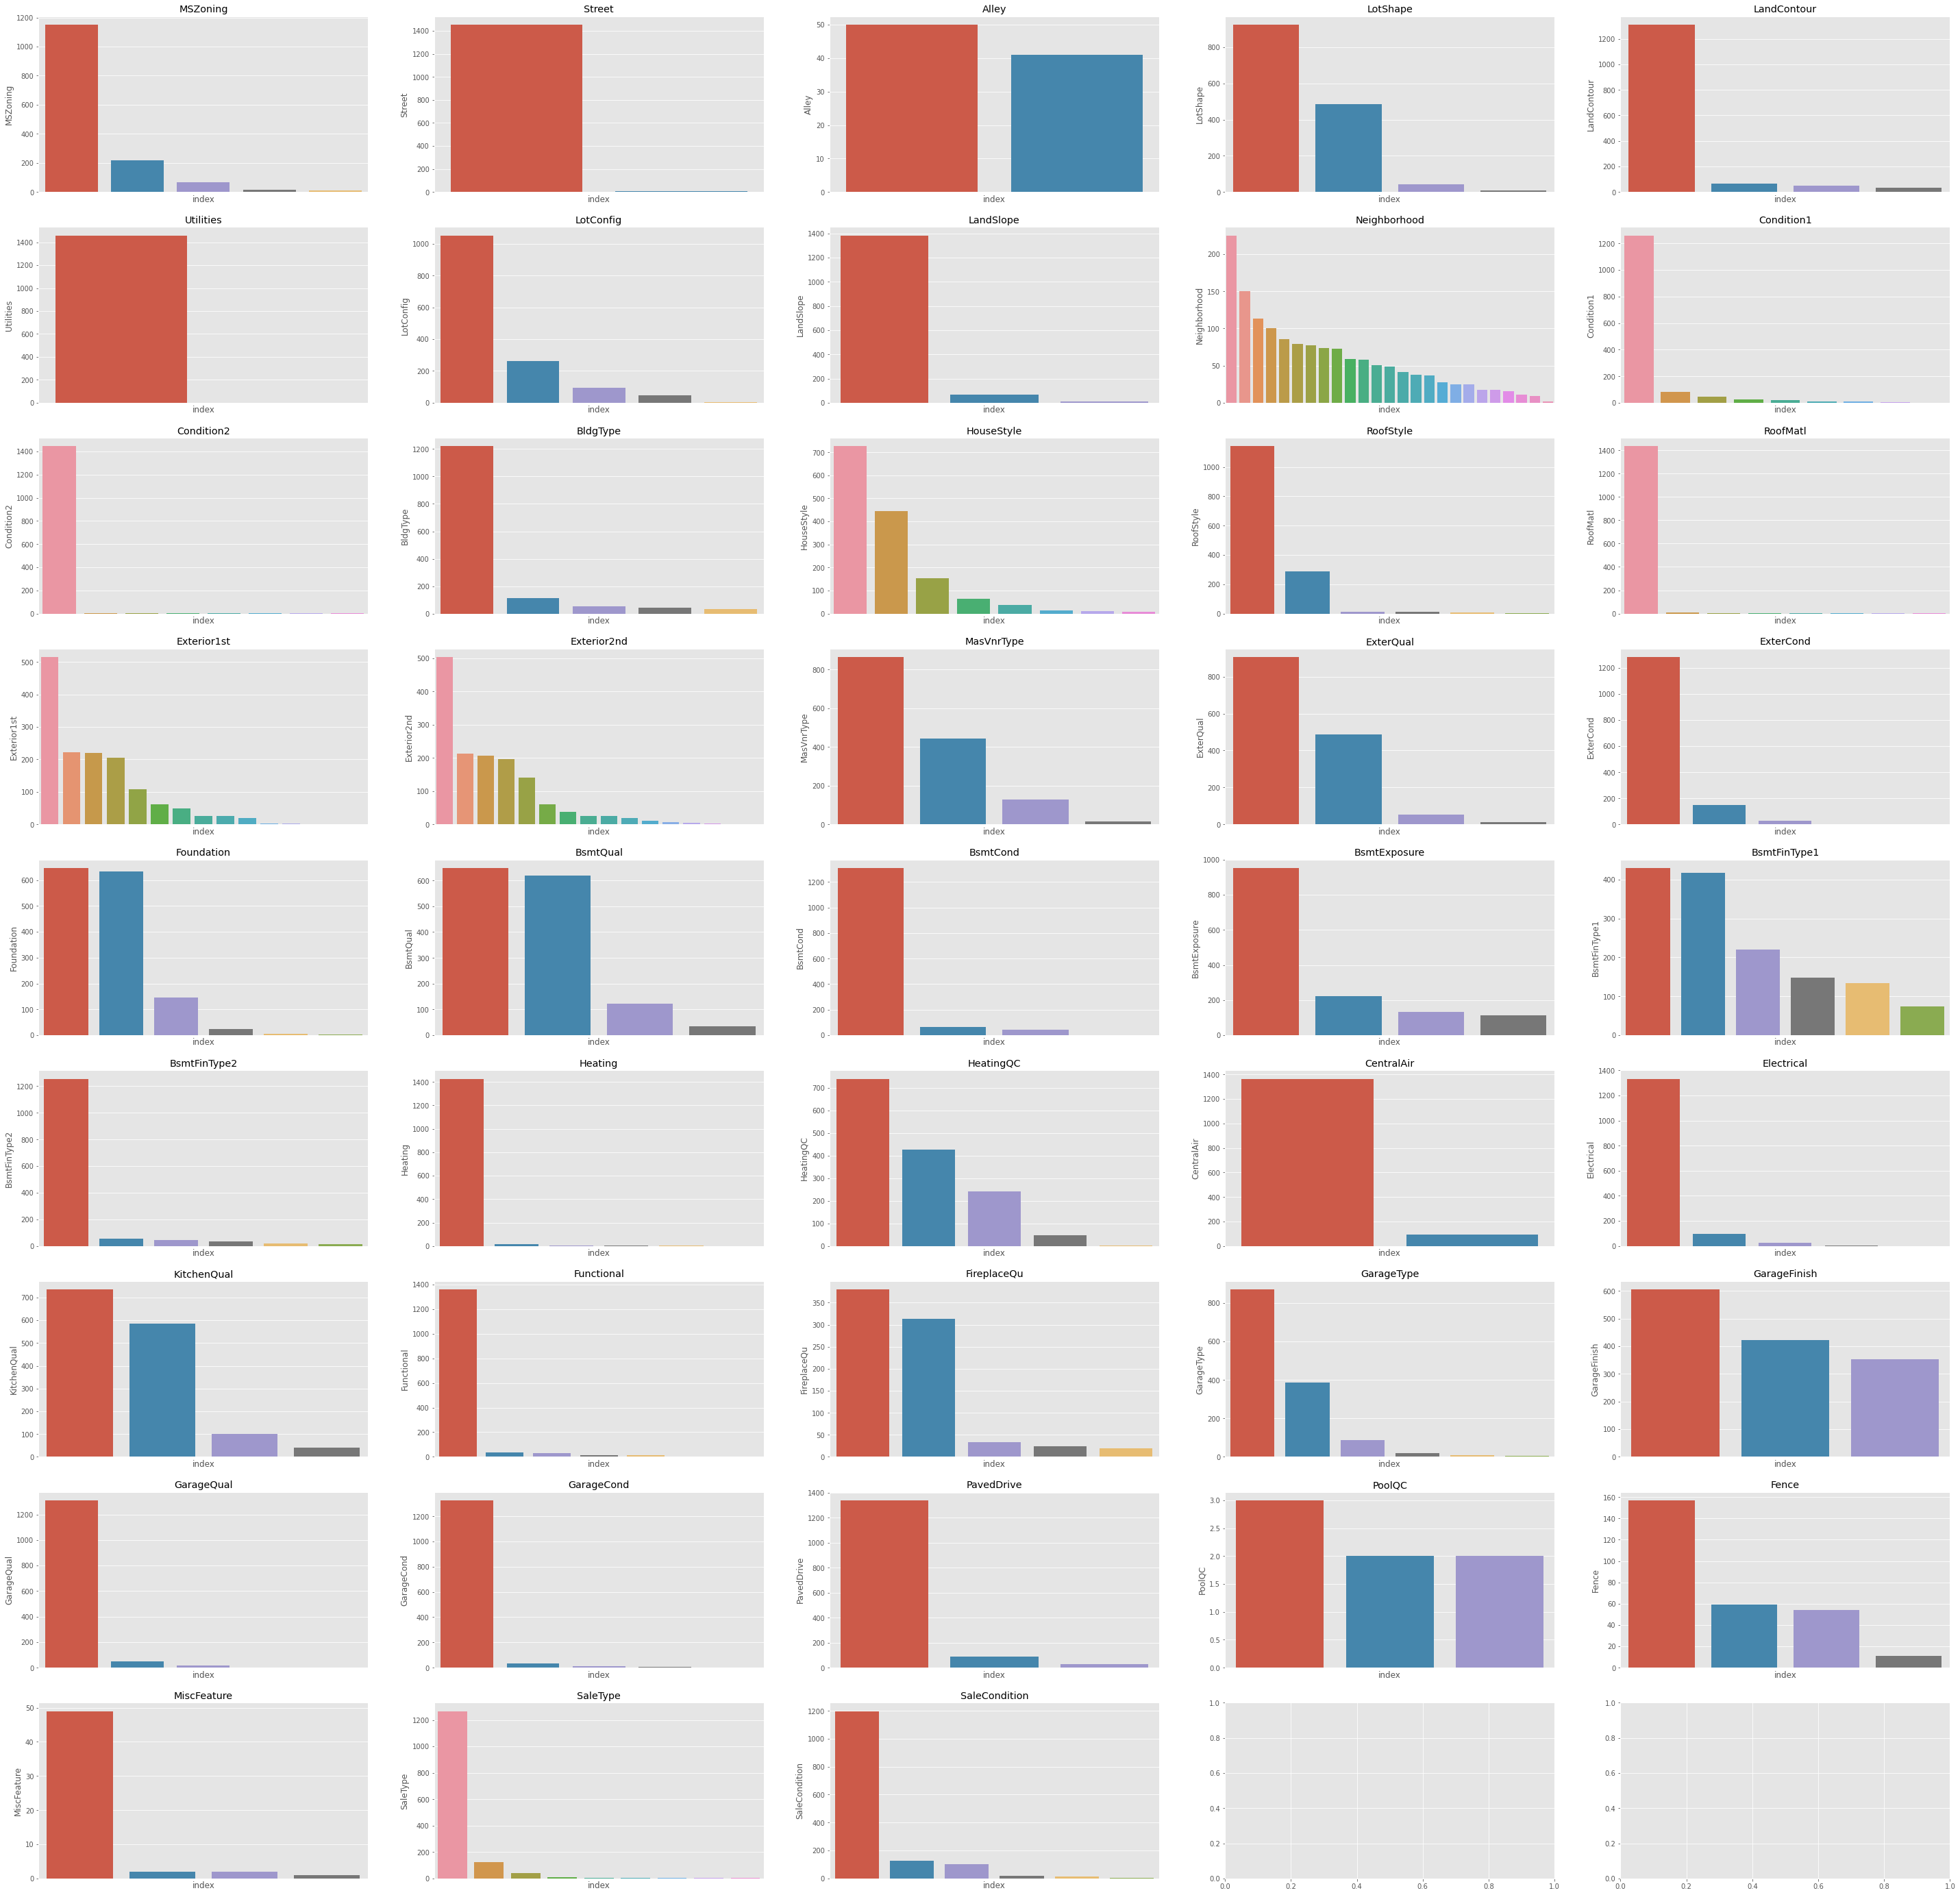

In [84]:
categorical_vars = train.columns[train.dtypes=='object']
f, ax = plt.subplots(9, 5, figsize=(50, 50))
for i, c in enumerate(categorical_vars):
    g = sns.barplot(data=pd.DataFrame(train[c].value_counts()).reset_index(), x='index', y=c, ax=ax[i//5, i%5])
    g.set(xticks=[])
    g.set(title=c)

#### We can probably drop features with one overwhelmingly common category:

In [85]:
remove_cat = ['Street', 'LandContour', 'Utilities', 
              'LandSlope', 'Condition1', 'Condition2', 
              'RoofMatl','BsmtCond', 'BsmtFinType2', 
              'Heating', 'GarageCond', 'GarageQual', 'Functional'] 
train = train.drop(remove_cat, axis=1)

### Now, let's do one-hot encodings for our categorical features:

In [86]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False,drop='first')
data_obj = ohe.fit_transform(train[train.columns[train.dtypes=='object']])

obj_df = pd.DataFrame(data_obj,columns=ohe.get_feature_names(train.columns[train.dtypes=='object']))
cat_columns = obj_df.columns

train = pd.concat([train[train.columns[train.dtypes!='object']], 
                         obj_df],
                        axis=1)

### Let's check for any low variance features and drop them:
#### First we must normalize:

In [87]:
# train = (train-train.mean())/train.std()
train=(train-train.min())/(train.max()-train.min())

In [88]:
low_var = train.columns[train.var()<.001]
print(low_var)
train = train.drop(columns=low_var,axis=0)

Index(['Exterior1st_AsphShn', 'Exterior1st_CBlock', 'Exterior1st_ImStucc',
       'Exterior2nd_CBlock', 'Exterior2nd_Other', 'ExterCond_Po',
       'HeatingQC_Po', 'Electrical_Mix', 'Electrical_nan', 'MiscFeature_TenC'],
      dtype='object')


### In order to run models, we must remove any Nan values:
#### First let's check which features have Nans:

In [89]:
train.columns[train.isna().any()].tolist()

['LotFrontage', 'MasVnrArea']

#### In these 2 cases, we can interpret any Nan values as 0:

In [90]:
train = train.fillna(0)

### Finding the best features can be done in numerous ways, we went with 3:
### - Extracting feature importance through Random Forest model
### - Checking correlation with target feature
### - Discussing real-life importance of features

#### Random Forest analysis:

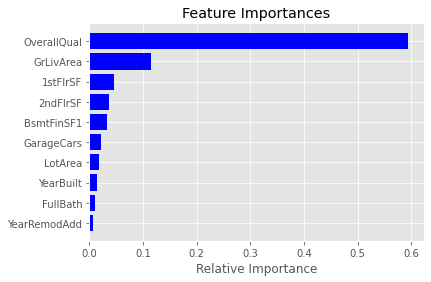

In [91]:
from sklearn.ensemble import RandomForestRegressor

X = train.drop(['Id', 'SalePrice'], axis=1)
y = train['SalePrice']

model = RandomForestRegressor(random_state=1, max_depth=10)
model.fit(X,y)

features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### Now, let's examine the best correlations with the target:

In [92]:
corr_vals = train.corr(method='pearson')
sorted_corr_vals = corr_vals['SalePrice'].sort_values(ascending=False)
temp = sorted_corr_vals.to_frame(name='corr')
temp.head(15)

,corr
SalePrice,1.000000
OverallQual,0.790982
GrLivArea,0.708624
GarageCars,0.640409
1stFlrSF,0.605852
FullBath,0.560664
YearBuilt,0.522897
YearRemodAdd,0.507101
Foundation_PConc,0.497734
MasVnrArea,0.472614


### These methods, along with group discussion on real-world impacts these features likely have on sale-price, we arrived at the following features to try:
- Overall Quality 
- GrLivArea
- LotArea 
- GarageCars
- FullBath 
- 1stFlrSF
- MasVnrArea 
- ExterQual
- YearBuilt  
- Neighborhood

In [93]:
Neighborhood = [col for col in train.columns if 'Neighborhood' in col]
ExterQual = [col for col in train.columns if 'ExterQual' in col]

features = ['OverallQual', 'GarageCars', 'FullBath', 
            'YearBuilt', '2ndFlrSF', 'MasVnrArea', 
            'LotArea', 'GrLivArea'] + Neighborhood + ExterQual

train[features]

,OverallQual,GarageCars,FullBath,YearBuilt,2ndFlrSF,MasVnrArea,LotArea,GrLivArea,Neighborhood_Blueste,Neighborhood_BrDale,...,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,0.666667,0.50,0.666667,0.949275,0.413559,0.122500,0.033420,0.259231,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.555556,0.50,0.666667,0.753623,0.000000,0.000000,0.038795,0.174830,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.666667,0.50,0.666667,0.934783,0.419370,0.101250,0.046507,0.273549,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.666667,0.75,0.333333,0.311594,0.366102,0.000000,0.038561,0.260550,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.777778,0.75,0.666667,0.927536,0.509927,0.218750,0.060576,0.351168,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.555556,0.50,0.666667,0.920290,0.336077,0.000000,0.030929,0.247362,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1456,0.555556,0.50,0.666667,0.768116,0.000000,0.074375,0.055505,0.327619,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1457,0.666667,0.25,0.666667,0.500000,0.557869,0.000000,0.036187,0.377920,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.444444,0.25,0.333333,0.565217,0.000000,0.000000,0.039342,0.140166,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Now let's create some new features! One way to do this is to derive features from different columns into a single columns.
### For this, we went with: 
- PorchDeckRank (scaled score of porch and deck quality) 
- TotRmsAbvGrdwithBath (totrms + full bath + halfbaths) 
- RelativeAge (YearRemodAdd-YrSold) + MoSold/12

In [94]:
data = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
train['RelAge'] = data['YrSold'] - data['YearRemodAdd'] + data['MoSold']/12
train['TotRmsAbvGrdBath'] = data[['TotRmsAbvGrd', 'FullBath', 'HalfBath']].sum(axis=1)
train['PorchDeckRank'] = data[['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch']].sum(axis=1)

new_features = ['RelAge','TotRmsAbvGrdBath','PorchDeckRank']

### Another way to add new columns is through PCA analzysis, where we compress variance into fewer columns, reducing dimensionality:

In [95]:
from sklearn.decomposition import PCA

pca = PCA()
x_pca = pca.fit_transform(train[features])
x_pca = pd.DataFrame(x_pca)

explained_variance = pca.explained_variance_ratio_
explained_variance
np.cumsum(pca.explained_variance_ratio_)

array([0.3292513 , 0.41212397, 0.47227141, 0.52438421, 0.57037526,
       0.6088599 , 0.64651598, 0.68077706, 0.711955  , 0.74038864,
       0.76820735, 0.79403366, 0.81672127, 0.83854254, 0.85738662,
       0.87482318, 0.89002873, 0.9035582 , 0.91608344, 0.92785764,
       0.93878284, 0.94916312, 0.9582522 , 0.96569067, 0.97215939,
       0.97749902, 0.98256594, 0.98685698, 0.99067368, 0.99405505,
       0.99660922, 0.99796609, 0.99886258, 0.99973992, 1.        ])

### The first two columns contain almost half of the overall variance information of the features, and can be used as extra features in our models:

In [96]:
train['PCA1'] = x_pca[[0]]
train['PCA2'] = x_pca[[1]]

#### Let's normalize these new features and add them to our feature list:

In [97]:
new_features += ['PCA1','PCA2']
train[new_features]=(train[new_features]-
                     train[new_features].min()
                    )/(train[new_features].max()-
                       train[new_features].min())

features += new_features

## Now, in order to evaluate our models, let's break our dataset into training and testing data:

In [98]:
from sklearn.model_selection import train_test_split

X = train[features]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#### Let's use the following metrics so we can compare using common metrics

In [99]:
from sklearn import metrics
# print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
# print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
# print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# print('R-squared Error:', metrics.r2_score(y_test, y_pred))

### Support Vector Machine for Regression (SVR)

In [100]:
from sklearn.svm import SVR

svr = SVR(kernel='linear', gamma='scale')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [101]:
svr_pred = svr.predict(X_test)

In [102]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svr_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svr_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('R-squared Error:', metrics.r2_score(y_test, svr_pred))

Mean Absolute Error: 0.04135557897032735
Mean Squared Error: 0.0034522321679494416
Root Mean Squared Error: 0.0587556990252813
R-squared Error: 0.7489976830562338


In [103]:
svr.get_params()

{'C': 1.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

#### Model Improvements - try different kernels

In [104]:
svr.set_params(C=10.0)
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svr_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svr_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('R-squared Error:', metrics.r2_score(y_test, svr_pred))

Mean Absolute Error: 0.040914040505939296
Mean Squared Error: 0.0033737349261150533
Root Mean Squared Error: 0.05808386115019432
R-squared Error: 0.7547050018620342


In [105]:
svr.set_params(kernel='poly')
svr.fit(X_train, y_train)
svr_pred = svr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, svr_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, svr_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, svr_pred)))
print('R-squared Error:', metrics.r2_score(y_test, svr_pred))

Mean Absolute Error: 0.040524663692564036
Mean Squared Error: 0.003005383161518647
Root Mean Squared Error: 0.05482137504221001
R-squared Error: 0.7814868467282039


In [106]:
svr.get_params()

{'C': 10.0,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 0.1,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Visualizing SVR

In [107]:
data = {'trial': [1, 2, 3],
        'kernel': ['linear', 'linear', 'poly'],
        'C': [1.0, 10.0, 10.0],
        'MAE': [0.04, 0.04, 0.04],
        'MSE': [0.003, 0.003, 0.003],
        'RMSE': [0.055, 0.058, 0.055],
        'R2': [0.749, 0.755, 0.781]}

svr_df = pd.DataFrame.from_dict(data)
svr_df

,trial,kernel,C,MAE,MSE,RMSE,R2
0,1,linear,1.0,0.04,0.003,0.055,0.749
1,2,linear,10.0,0.04,0.003,0.058,0.755
2,3,poly,10.0,0.04,0.003,0.055,0.781


(0.0, 0.9)

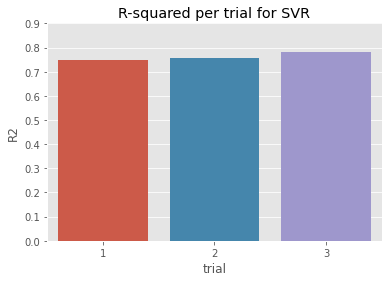

In [108]:
sns.barplot(data=svr_df, x="trial", y='R2')
sns.despine()
plt.title('R-squared per trial for SVR')
plt.ylim(0, .90)

# KNN Model

In [109]:
from sklearn import neighbors
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split 

X = train[features]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.03629831853642854
Mean Squared Error: 0.0041264087683966525
Root Mean Squared Error: 0.06423712920419664
R-squared Error: 0.6999801545387254


### Evaluating different parameters

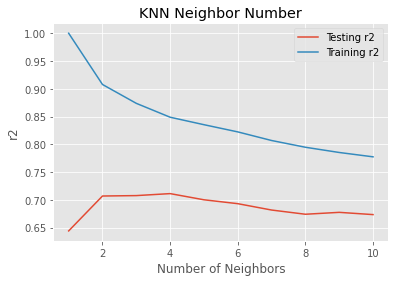

In [110]:
neighbors = np.arange(1,11)
train_r2 = np.empty(len(neighbors))
test_r2 = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_r2[i] = knn.score(X_train, y_train)
    test_r2[i] = knn.score(X_test, y_test)

plt.title('KNN Neighbor Number')
plt.plot(neighbors, test_r2, label = 'Testing r2')
plt.plot(neighbors, train_r2, label = 'Training r2')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('r2')
plt.show()

In [111]:
knn = KNeighborsRegressor(n_neighbors = 4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.035549657296456164
Mean Squared Error: 0.003973429329800347
Root Mean Squared Error: 0.06303514360894522
R-squared Error: 0.7111028692532566


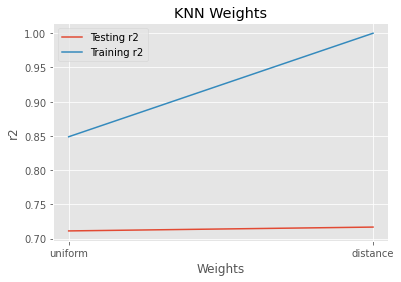

In [112]:
weights_opt = ['uniform', 'distance']
train_r2 = np.empty(len(weights_opt))
test_r2 = np.empty(len(weights_opt))

for i in range(len(weights_opt)):
    knn = KNeighborsRegressor(n_neighbors = 4, weights = weights_opt[i])
    knn.fit(X_train, y_train)
    train_r2[i] = knn.score(X_train, y_train)
    test_r2[i] = knn.score(X_test, y_test)

plt.title('KNN Weights')
plt.plot(weights_opt, test_r2, label = 'Testing r2')
plt.plot(weights_opt, train_r2, label = 'Training r2')
plt.legend()
plt.xlabel('Weights')
plt.ylabel('r2')
plt.show()

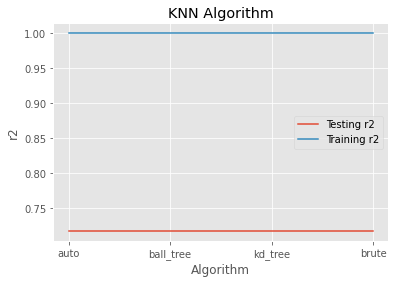

In [113]:
alg = ['auto', 'ball_tree', 'kd_tree', 'brute']
train_r2 = np.empty(len(alg))
test_r2 = np.empty(len(alg))

for i in range(len(alg)):
    knn = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = alg[i])
    knn.fit(X_train, y_train)
    train_r2[i] = knn.score(X_train, y_train)
    test_r2[i] = knn.score(X_test, y_test)

plt.title('KNN Algorithm')
plt.plot(alg, test_r2, label = 'Testing r2')
plt.plot(alg, train_r2, label = 'Training r2')
plt.legend()
plt.xlabel('Algorithm')
plt.ylabel('r2')
plt.show()

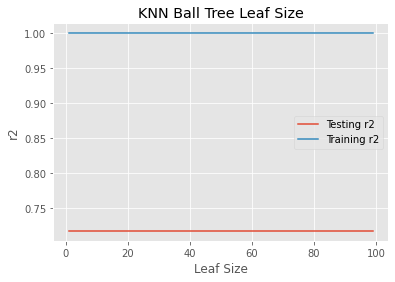

In [114]:
leaf = np.arange(1,100)
train_r2 = np.empty(len(leaf))
test_r2 = np.empty(len(leaf))

for i,k in enumerate(leaf):
    knn = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'ball_tree', leaf_size = k)
    knn.fit(X_train, y_train)
    train_r2[i] = knn.score(X_train, y_train)
    test_r2[i] = knn.score(X_test, y_test)

plt.title('KNN Ball Tree Leaf Size')
plt.plot(leaf, test_r2, label = 'Testing r2')
plt.plot(leaf, train_r2, label = 'Training r2')
plt.legend()
plt.xlabel('Leaf Size')
plt.ylabel('r2')
plt.show()

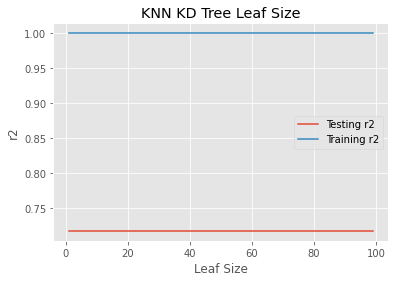

In [115]:
leaf = np.arange(1,100)
train_r2 = np.empty(len(leaf))
test_r2 = np.empty(len(leaf))

for i,k in enumerate(leaf):
    knn = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'kd_tree', leaf_size = k)
    knn.fit(X_train, y_train)
    train_r2[i] = knn.score(X_train, y_train)
    test_r2[i] = knn.score(X_test, y_test)

plt.title('KNN KD Tree Leaf Size')
plt.plot(leaf, test_r2, label = 'Testing r2')
plt.plot(leaf, train_r2, label = 'Training r2')
plt.legend()
plt.xlabel('Leaf Size')
plt.ylabel('r2')
plt.show()

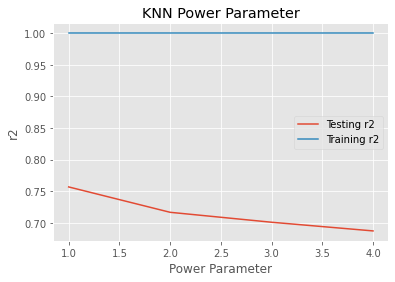

In [116]:
p = np.arange(1,5)
train_r2 = np.empty(len(p))
test_r2 = np.empty(len(p))

for i,k in enumerate(p):
    knn = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'auto', p = k)
    knn.fit(X_train, y_train)
    train_r2[i] = knn.score(X_train, y_train)
    test_r2[i] = knn.score(X_test, y_test)

plt.title('KNN Power Parameter')
plt.plot(p, test_r2, label = 'Testing r2')
plt.plot(p, train_r2, label = 'Training r2')
plt.legend()
plt.xlabel('Power Parameter')
plt.ylabel('r2')
plt.show()

In [117]:
knn = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'auto', p = 1)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_knn))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_knn))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred_knn))

Mean Absolute Error: 0.03316057122741931
Mean Squared Error: 0.003344340900037174
Root Mean Squared Error: 0.057830276672666665
R-squared Error: 0.7568421607467553


# Overall r2 of KNN Model After Testing

In [118]:
knn = KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'auto', p = 1)
knn.fit(X_train, y_train)
r2 = knn.score(X_test, y_test)
print('Final R2:', str(format(r2*100, '.3f')) + '%')

Final R2: 75.684%


# Improvement Visualizations

### 1. Initial Version
### 2. Neighbor Number
### 3. Weights
### 4. Algorithm
### 5. Ball Tree Leaf Size
### 6. KD Tree Leaf Size
### 7. Power Parameter

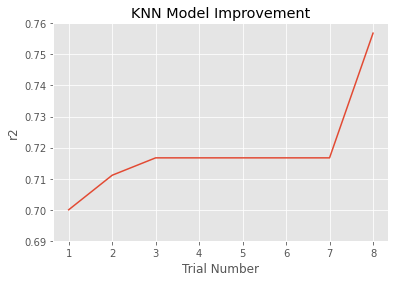

In [119]:
X = train[features]
y = train['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

knn = [KNeighborsRegressor(n_neighbors = 5),
       KNeighborsRegressor(n_neighbors = 4),
       KNeighborsRegressor(n_neighbors = 4, weights = 'distance'),
       KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'auto'),
       KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'auto'),
       KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'ball_tree', leaf_size = 100),
       KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'kd_tree', leaf_size = 100),
       KNeighborsRegressor(n_neighbors = 4, weights = 'distance', algorithm = 'auto', p = 1)
]
trials = np.arange(1, 9)
r2 = np.empty(len(trials))
y_pred = np.empty(len(trials))

for i,k in enumerate(trials):
    model = knn[i]
    model.fit(X_train, y_train)
    r2[i] = metrics.r2_score(y_test, model.predict(X_test))

plt.title('KNN Model Improvement')
plt.plot(trials, r2)
plt.xlabel('Trial Number')
plt.ylabel('r2')
plt.ylim([0.69, 0.76])
plt.show()

# Linear Regression

In [120]:
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

X = train[features]
y = train['SalePrice']

lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
lr.fit(X_train, y_train)
y_pred_lr_1 = lr.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred_lr_1),4))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_lr_1),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr_1)),4))
print('R-squared Error:', round(metrics.r2_score(y_test, y_pred_lr_1), 4))

Mean Absolute Error: 0.0308
Mean Squared Error: 0.0025
Root Mean Squared Error: 0.0498
R-squared Error: 0.82


In [121]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': False,
 'positive': False}

## Checking for Improvements

<AxesSubplot:>

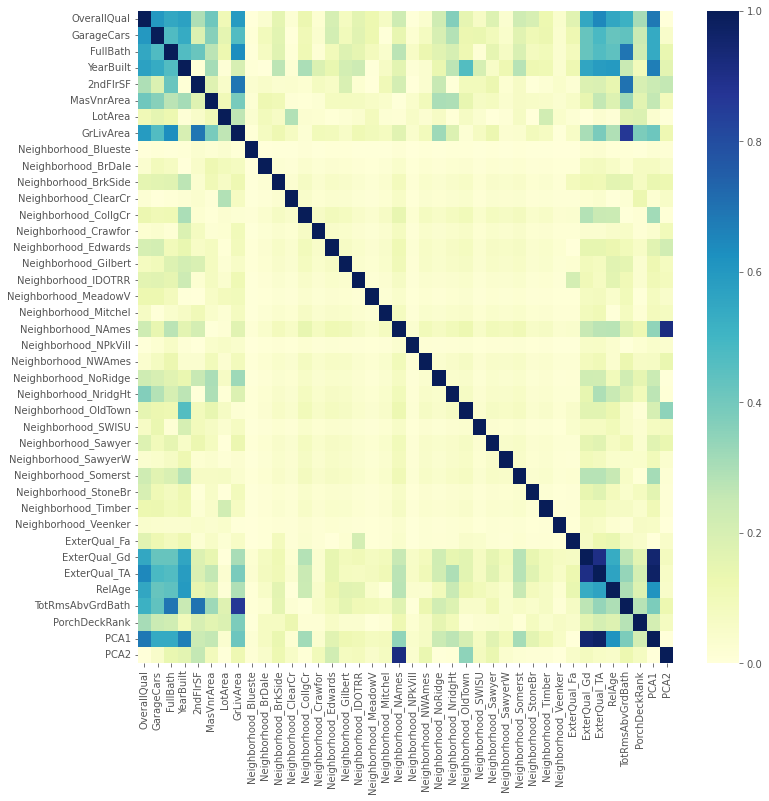

In [122]:
#Plotting a heatmap to view the features
plt.figure(figsize=(12, 12))
sns.heatmap(abs(X.corr()), cmap='YlGnBu')

In [123]:
#Droppig some of the features to improve the model
X=X.drop(['ExterQual_Fa','ExterQual_Gd','ExterQual_TA'],axis=1)
X.describe().T

,count,mean,std,min,25%,50%,75%,max
OverallQual,1460.0,0.566591,0.153666,0.0,0.444444,0.555556,0.666667,1.0
GarageCars,1460.0,0.441781,0.186829,0.0,0.250000,0.500000,0.500000,1.0
FullBath,1460.0,0.521689,0.183639,0.0,0.333333,0.666667,0.666667,1.0
YearBuilt,1460.0,0.719332,0.218862,0.0,0.594203,0.731884,0.927536,1.0
2ndFlrSF,1460.0,0.168035,0.211394,0.0,0.000000,0.000000,0.352542,1.0
MasVnrArea,1460.0,0.064448,0.112957,0.0,0.000000,0.000000,0.102656,1.0
LotArea,1460.0,0.043080,0.046653,0.0,0.029229,0.038227,0.048150,1.0
GrLivArea,1460.0,0.222582,0.098998,0.0,0.149868,0.212886,0.271807,1.0
Neighborhood_Blueste,1460.0,0.001370,0.036999,0.0,0.000000,0.000000,0.000000,1.0
Neighborhood_BrDale,1460.0,0.010959,0.104145,0.0,0.000000,0.000000,0.000000,1.0


In [124]:
#no improvements found
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)
lr.fit(X_train, y_train)
y_pred_lr_2 = lr.predict(X_test)

from sklearn import metrics
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred_lr_2),4))  
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred_lr_2),4))  
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr_2)),4))
print('R-squared Error:', round(metrics.r2_score(y_test, y_pred_lr_2), 4))

Mean Absolute Error: 0.0316
Mean Squared Error: 0.0025
Root Mean Squared Error: 0.05
R-squared Error: 0.8185


## Visualizing LR

In [125]:
data = {'MAE': [0.0316],
        'MSE': [0.0025],
        'RMSE': [0.05],
        'R2': [0.8185]}

lr_df = pd.DataFrame.from_dict(data)
lr_df

,MAE,MSE,RMSE,R2
0,0.0316,0.0025,0.05,0.8185


(0.81, 0.83)

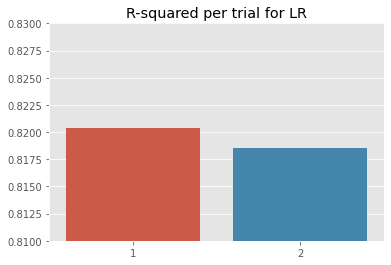

In [126]:
sns.barplot(x=[1,2], y=[0.8204, .8185])
sns.despine()
plt.title('R-squared per trial for LR')
plt.ylim(.81, .83)

# Let's compare all of the models:

In [127]:
res = {'LR':{'MAE':metrics.mean_absolute_error(y_test, y_pred_lr_1),
                   'MSE':metrics.mean_squared_error(y_test, y_pred_lr_1),
                   'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred_lr_1)),
                   'R2':metrics.r2_score(y_test, y_pred_lr_1)},
             'KNN':{'MAE':metrics.mean_absolute_error(y_test, y_pred_knn),
                   'MSE':metrics.mean_squared_error(y_test, y_pred_knn),
                   'RMSE':np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)),
                   'R2':metrics.r2_score(y_test, y_pred_knn)},
             'SVM':{'MAE':metrics.mean_absolute_error(y_test, svr_pred),
                   'MSE':metrics.mean_squared_error(y_test, svr_pred),
                   'RMSE':np.sqrt(metrics.mean_squared_error(y_test, svr_pred)),
                   'R2':metrics.r2_score(y_test, svr_pred)}}

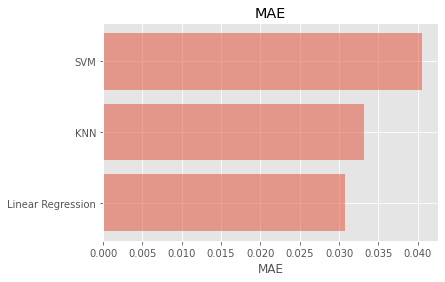

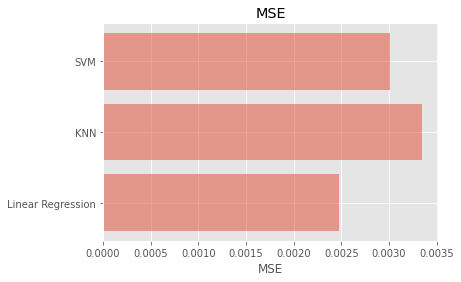

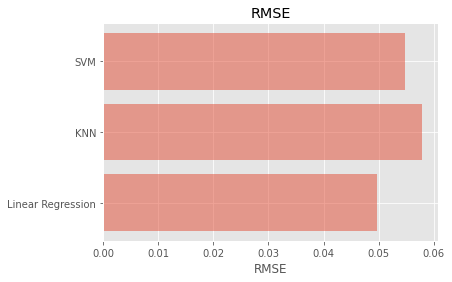

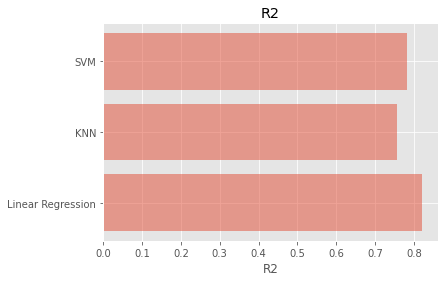

In [128]:
for metric in ['MAE', 'MSE', 'RMSE', 'R2']:
    objects = ('Linear Regression', 'KNN', 'SVM')
    y_pos = np.arange(len(objects))
    performance = [res['LR'][metric], 
                   res['KNN'][metric], 
                   res['SVM'][metric]]

    plt.barh(y_pos, performance, align='center', alpha=0.5)
    plt.yticks(y_pos, objects)
    plt.xlabel(metric)
    plt.title(metric)

    plt.show()

# We can determine that Linear Regression without modification was our best performing algorithm for this project